In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers


In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train/255
x_test = x_test/255

In [4]:
print(x_train.shape) #60000 values, 28x28 values
print(y_train.shape) #60000 'titles'

(60000, 28, 28)
(60000,)


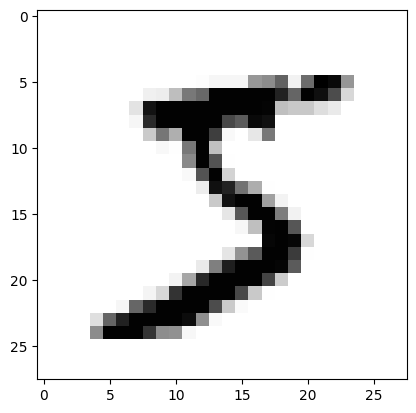

In [5]:
plt.imshow(x_train[0], cmap = 'Greys')

## Single Layer Perceptron

**Using Categorical Crossentropy**:
If your labels are one-hot encoded, this method is preferred as we change the data to be one-hot encoded. Before we utilized the one-hot function, our data would only compile one output due to only one batch being set up, hence an error.

In [6]:
#Functions in Sequential take outputs from previous functions and utilize them as inputs automatically
model_lr = tf.keras.models.Sequential([ 
    layers.Input(x_train.shape[1:]), 
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])
model_lr.compile(optimizer='adam', loss='categorical_crossentropy', metrics =['accuracy'])
model_lr.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

**Training Our Model**

In [7]:
y_onehot_train = tf.one_hot(y_train,10)
model_lr.fit(x_train,y_onehot_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 384us/step - accuracy: 0.8145 - loss: 0.7143


**Using Sparse Categorical Crossentropy**:
Preferred if your labels are integers. Instead of one-hot encoding, we can just utilize the data as is without having to encode it manually.

In [8]:
model_lr = tf.keras.models.Sequential([ 
    layers.Input(x_train.shape[1:]), 
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])
model_lr.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics =['accuracy'])
model_lr.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
#model_lr.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2) #randomly generates subset from the training set for validation
history_lr = model_lr.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test)) #directly compares to the test set for validation
#you can insert the verbose=False argument to make it skip the training progress below

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 700us/step - accuracy: 0.7338 - loss: 1.0226 - val_accuracy: 0.9009 - val_loss: 0.3834
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - accuracy: 0.8997 - loss: 0.3717 - val_accuracy: 0.9122 - val_loss: 0.3189
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - accuracy: 0.9101 - loss: 0.3233 - val_accuracy: 0.9155 - val_loss: 0.2961
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.9152 - loss: 0.3040 - val_accuracy: 0.9211 - val_loss: 0.2860
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - accuracy: 0.9198 - loss: 0.2895 - val_accuracy: 0.9229 - val_loss: 0.2783
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.9229 - loss: 0.2757 - val_accuracy: 0.9237 - val_loss: 0.2739
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.9235 - loss: 0.2761 - val_accuracy: 0.9234 - val_loss: 0.2733
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - accuracy: 0.9266 - loss: 0.2660 - 

**Testing our model**

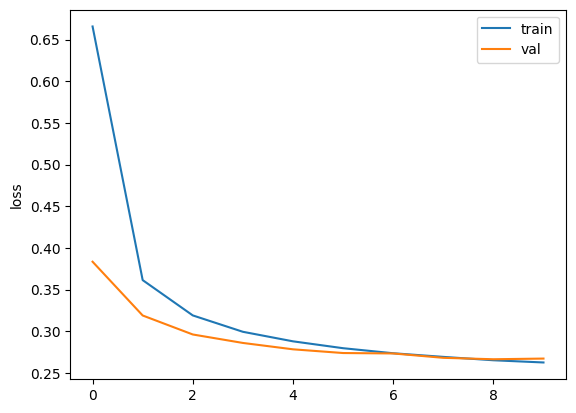

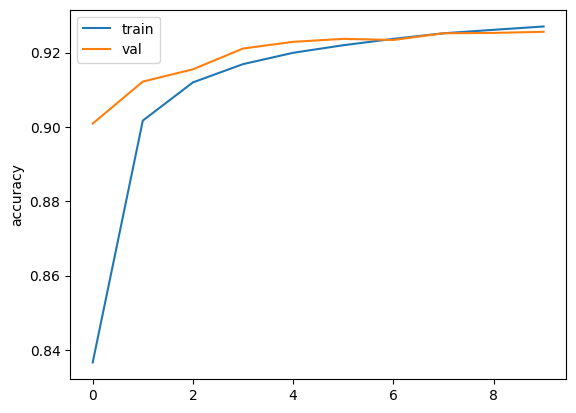

In [10]:
plt.plot(history_lr.history['loss'], label='train')
plt.plot(history_lr.history['val_loss'], label='val')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(history_lr.history['accuracy'], label='train')
plt.plot(history_lr.history['val_accuracy'], label='val')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [11]:
model_lr.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - accuracy: 0.9147 - loss: 0.3022


[0.2672089636325836, 0.925599992275238]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[1.3234392e-05 2.0596810e-10 4.4016098e-05 5.7862131e-03 9.2976927e-07
 3.2981090e-05 2.3888178e-09 9.9356550e-01 3.3653178e-05 5.2348751e-04]  is  7


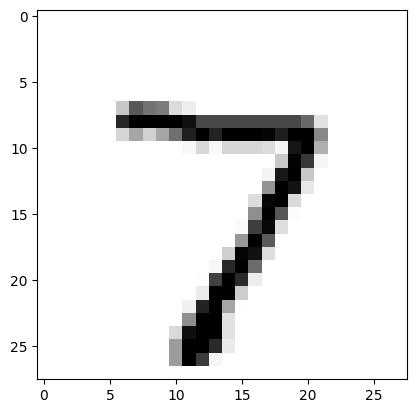

[7.6684728e-04 5.2238215e-06 9.8766243e-01 8.3409983e-04 6.0638864e-13
 4.2778300e-03 6.2724221e-03 7.7472005e-15 1.8118296e-04 1.8602364e-11]  is  2


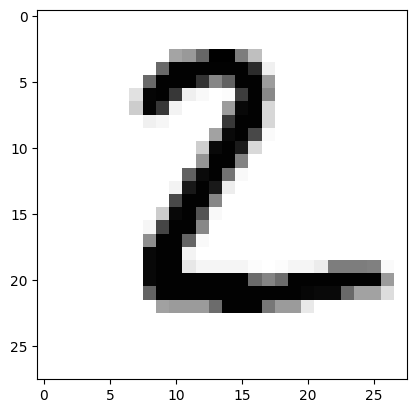

[9.3313474e-06 9.7444212e-01 1.3075574e-02 3.3376643e-03 2.2055935e-04
 7.6577265e-04 1.4962462e-03 1.9471081e-03 4.3368316e-03 3.6874390e-04]  is  1


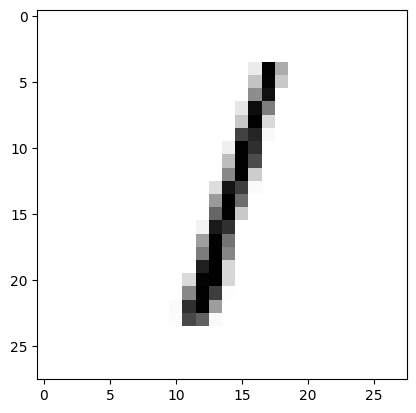

[9.9988580e-01 1.6587428e-11 3.0744752e-05 2.0430723e-06 1.7561060e-08
 2.9754905e-05 3.4131637e-05 3.6207121e-06 9.9689078e-06 3.8703429e-06]  is  0


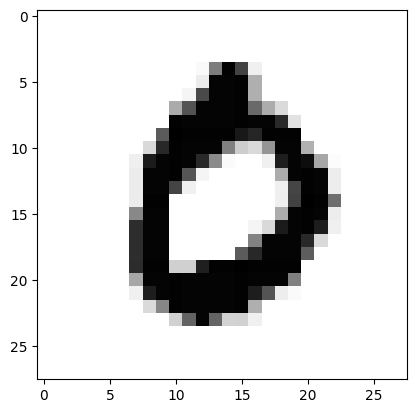

[5.13562642e-04 8.15381497e-07 1.66444620e-03 4.27642954e-05
 9.71276045e-01 1.05209125e-04 1.39341527e-03 2.17897445e-03
 3.65041359e-03 1.91743653e-02]  is  4


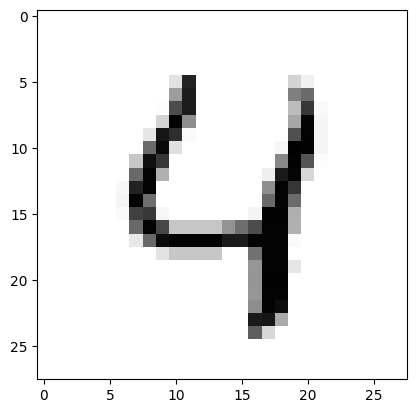

[6.2467399e-07 9.8969030e-01 2.4494976e-03 1.7342309e-03 2.8534409e-05
 5.5116925e-05 3.3013166e-05 2.8037147e-03 2.7839143e-03 4.2109450e-04]  is  1


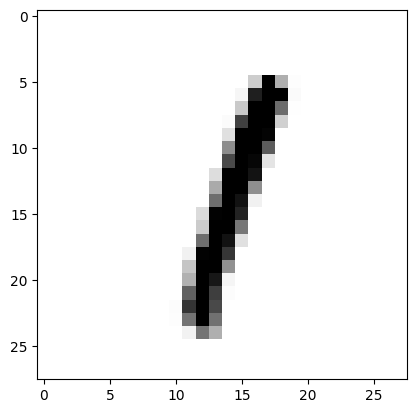

[1.79396307e-06 1.78418574e-07 7.31701675e-07 1.11067864e-04
 9.79800522e-01 3.00624757e-03 3.05032609e-05 5.35768690e-04
 9.60353855e-03 6.90983050e-03]  is  4


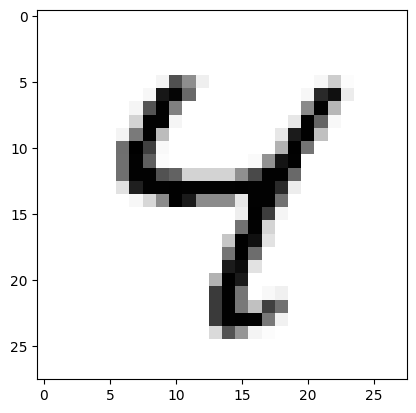

[1.0168706e-07 5.6777303e-03 3.5035101e-04 1.1930112e-03 1.5540957e-02
 7.6232366e-03 5.2821029e-05 4.3168539e-04 3.4818391e-03 9.6564817e-01]  is  9


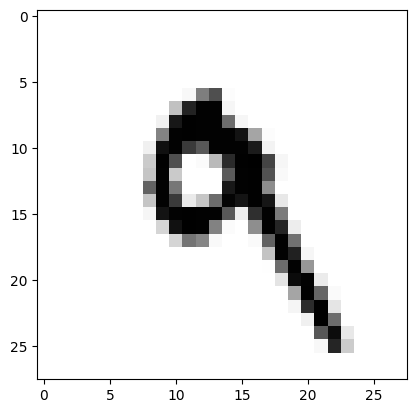

[3.9286961e-04 1.7353040e-08 3.3045224e-05 2.6757521e-09 1.5671024e-03
 6.2188937e-04 9.9723357e-01 1.4260065e-09 1.5070662e-04 7.9181154e-07]  is  6


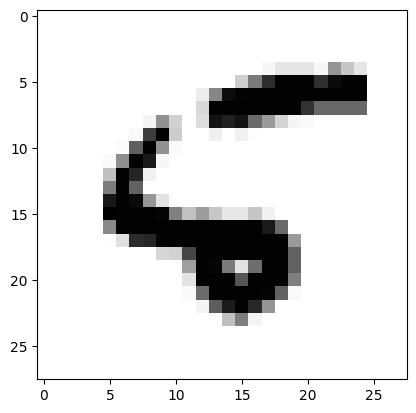

[1.6979013e-06 4.4189091e-10 1.2196475e-07 2.6359808e-06 2.6101325e-02
 1.3117130e-05 6.7891608e-07 3.1555146e-02 1.7961826e-03 9.4052905e-01]  is  9


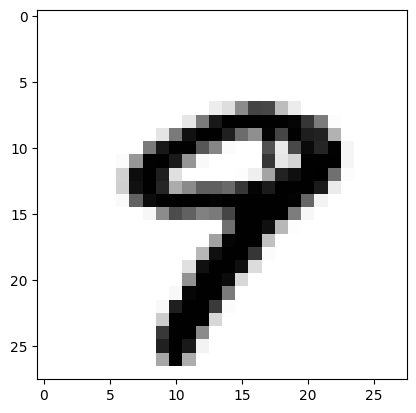

In [12]:
probabilities = model_lr.predict(x_test[:10])
predictions = np.argmax(probabilities, axis=1)
for i in range(10):
    print(probabilities[i], " is ", predictions[i])
    plt.imshow(x_test[i], cmap = "Greys")
    plt.show()

## Multilayer Perceptron

Models with too many layers tend to overfit as you will see in the charts below

In [13]:
model_mlp = tf.keras.models.Sequential([ 
    layers.Input(x_train.shape[1:]), 
    layers.Flatten(),
    layers.Dense(64, activation='elu'),
    layers.Dense(64, activation='elu'),
    layers.Dense(10, activation='softmax')
])
model_mlp.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics =['accuracy'])
model_mlp.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history_mlp = model_mlp.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 972us/step - accuracy: 0.8120 - loss: 0.6692 - val_accuracy: 0.9311 - val_loss: 0.2369
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - accuracy: 0.9396 - loss: 0.2077 - val_accuracy: 0.9505 - val_loss: 0.1620
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - accuracy: 0.9545 - loss: 0.1517 - val_accuracy: 0.9586 - val_loss: 0.1331
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - accuracy: 0.9672 - loss: 0.1164 - val_accuracy: 0.9616 - val_loss: 0.1218
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - accuracy: 0.9717 - loss: 0.0936 - val_accuracy: 0.9677 - val_loss: 0.1024
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - accuracy: 0.9770 - loss: 0.0774 - val_accuracy: 0.9694 - val_loss: 0.0937
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - accuracy: 0.9801 - loss: 0.0643 - val_accuracy: 0.9699 - val_loss: 0.0924
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - accuracy: 0.9838 - loss: 0.0544 - 

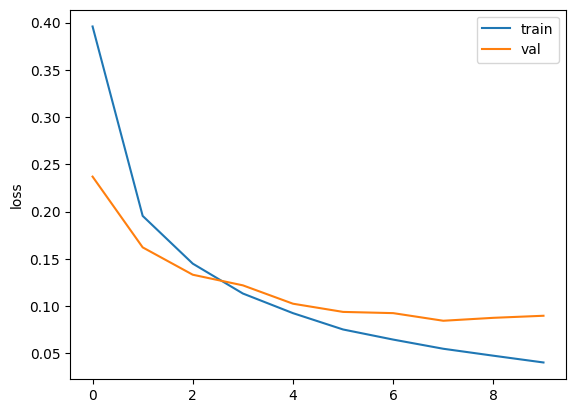

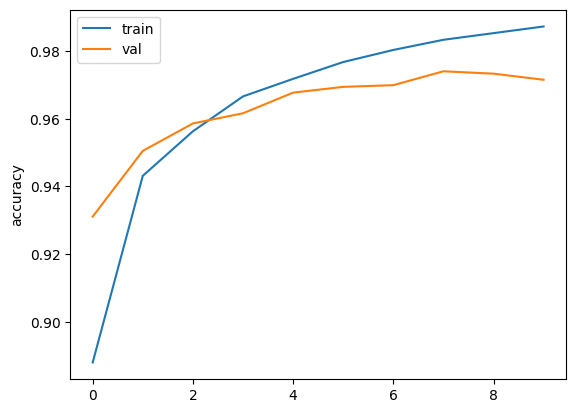

In [16]:
plt.plot(history_mlp.history['loss'], label='train')
plt.plot(history_mlp.history['val_loss'], label='val')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(history_mlp.history['accuracy'], label='train')
plt.plot(history_mlp.history['val_accuracy'], label='val')
plt.ylabel('accuracy')
plt.legend()
plt.show()